In [105]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import sys
from glob import glob
from scipy import ndimage
import sys
import cv2

In [95]:
path = 'AbdominalCT/_102029__0902083116/*.dcm'
path_nii = 'AbdominalCT/_102029__0902083116/24883815.nii.gz'
path_out = 'AbdominalCT/_102029__0902083116/mask/'

In [67]:
# load the DICOM files
files = []
print('glob: {}'.format(sys.argv[1]))
for fname in glob(path, recursive=False):
    print("loading: {}".format(fname))
    files.append(pydicom.dcmread(fname))

print("file count: {}".format(len(files)))

# skip files with no SliceLocation (eg scout views)
slices = []
skipcount = 0
for f in files:
    if hasattr(f, 'SliceLocation'):
        slices.append(f)
    else:
        skipcount = skipcount + 1

print("skipped, no SliceLocation: {}".format(skipcount))

glob: -f
loading: AbdominalCT/_102029__0902083116\ser002img00001.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00002.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00003.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00004.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00005.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00006.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00007.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00008.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00009.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00010.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00011.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00012.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00013.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00014.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00015.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00016.dcm
loading: AbdominalCT/_102029__0

loading: AbdominalCT/_102029__0902083116\ser002img00138.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00139.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00140.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00141.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00142.dcm
file count: 142
skipped, no SliceLocation: 0


In [102]:
k = 93

# ensure they are in the correct order
slices = sorted(slices, key=lambda s: s.SliceLocation)

# pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

# create 3D array
img_shape = list(slices[93].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d

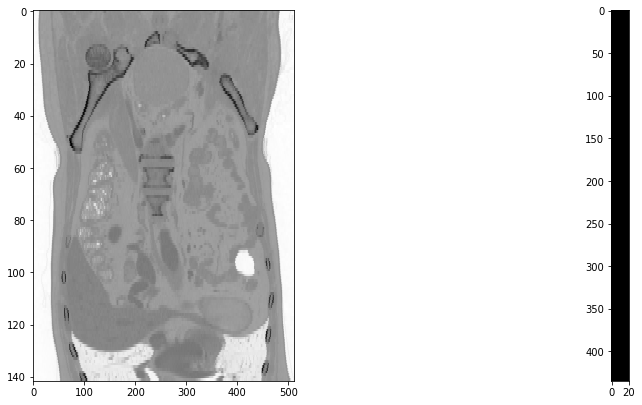

In [111]:
# plot 3 orthogonal slices

#a1 = plt.subplot(2, 2, 1)
#plt.imshow(img3d[:, :, img_shape[2]//2],cmap="gray")
#a1.set_aspect(ax_aspect)

#a2 = plt.subplot(2, 2, 2)
#plt.imshow(img3d[:, img_shape[1]//2, :],cmap="gray")
#a2.set_aspect(sag_aspect)

# coronal 뷰 보여주기
a3 = plt.subplot(2, 2, 1)
plt.imshow(img3d[img_shape[0]//2, :, :].T,cmap=plt.cm.binary)
a3.set_aspect(cor_aspect)

# Nifti Annotation 이미지 보여주기
a4 = plt.subplot(2, 2, 2)
im = Image.open(path_out+'mask_nii%d.png'%(k))

rotated_img = ndimage.rotate(im,90) #img 90 degree rotation
#img_mirror = cv2.flip(rotated_img, 0) #img mirror

plt.imshow(nii_new)
plt.show()

plt.rcParams["figure.figsize"] = (15,15)
plt.show()